# day 228

# 1. What are 3 areas in industry where computer vision is currently being used?

* protein structure predicion.
* signal processing the eeg signals extracted from brain.
* Robotics- to make the warehouse robots to view and get to the location of the shelf where the item which was placed order on could be found and pick and pack it up.
* To segerate the waste materials to go to landfills and sewage reducing the human involevment in this nauseating works.
* for drug discovery.




# 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

* overfitting is having the train_accuracy and train_loss be at a starkingly distinguishable improved position compared to test accuracy and test loss. for example the train accuracy could be 99.99% but the test accuracy would hover around 65%. This is the classic example of overfitting.
* overfitting means the model being trained with the training data set so well that it sort of built a memory around where what should be in training data but miopic enough to generalize well on the unseen data meaning it can't predict/classify well on unseen data. But the world is full of unseen shit data. so someone living in an Ivory Tower of their little learning would not be a reliable fit that's what this overfitting model is.
* the model just picks on minute details of the training data to an extent that when it does not see such details being presented in the unseen data, it simply misclassifies to be a different category of object when in reality they are of the same category.
* overfitting can be related with a student who simply memorizes the stuff in his textbook, he can infact score 100% had be been asked questions only from the textbook, but if we change any particular detail about the problem and prsent the problem with differnt wordings he may fumble and crumble this is a perfect analogy for overfitting.

# 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

0. make sure the training and test datasets are balanced and are in proper proportion. the classic distribution is 80:20.
1. normalize the data. scale it between reasonable values.
2. augment the data. make the training data hard for the model to learn to well so that it would only pick up the relatable patterns. eg seeing a zoomed up picture or flipped upside down kind of pictures are all the real life incidences that the model might encounter when the model is deployed in the real world. so, training the model with these "not-so" perfect images might help it to generalize well on images in real world.
3. have large amounts of data for the model to train on. larger the data, better its performance and lesser the probability of the model to train to well on any particular pattern.
4. Data Regularization: L1 and L2 regularizations are most common. they penalize the model when it gives out large parameter values or feature values preventing overfitting.
5. Ensemble methods: Bagging and Boosting. which means we not only rely on one model's prediction on that dataset, we get to have many models predicting on that dataset and we average their results. this would avoid overfitting or even if one model overfitted the other model's collective performance will weigh down its influence.  


# 4. Spend 20-minutes reading and clicking through the CNN Explainer website.
Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.

# kernel_size:
* these are hovering matrix that would hover over an image and gives out weights and biases based on learned patterns on the image.

# stride length:
* stride length is the distance the kernel takes to stride or walk on the image.

# padding:
* padding is used to preserve the information that are on the corner of the image.
* without padding (padding=False) some information of the input would be lost to oblivion during processing or dot producting of the image.


# Maxpooling:
* max pooling layer reduces the size of the matrix inputted in it therefore getting the matrix to size of the label vector (y_train,y_test).


# Graph Theory for computer vision:
By using a graph representation, we can leverage the abundant research in graph algorithms to extract attribution graphs from a [[computer vision]] network that show neuron relationships and substructures within the entire neural network that contribute to a model’s outcomes.
* Brief:
	why not?

 * Can model developers be confident that their network has learned what they think it has learned? We can start to answer questions like these with attribution graphs. For example, consider the tench class (a type of yellow-brown fish). Starting from the first layer, we notice the attribution graph for tench does not contain any fish or water features, but instead shows many _"finger,"_ _"hand,"_ and _"people"_ detectors. It is not until a middle layer, mixed4d, that the first fish and scale detectors are seen; however, even these detectors focus solely on the body of the fish (there is no fish eye, face, or fin detectors). Inspecting dataset examples reveals many image patches where we see people's fingers holding fish, presumably after catching them. This prompted us to inspect the raw data for the tench class, where indeed, most of the images are of a person holding the fish. We conclude that, unexpectedly, the network uses people detectors and in combination with brown fish body and scale detectors to represent the tench class. Generally, we would not expect "people" as an essential feature for classifying fish.
* Brief:
	 * This is why need to have clear pictures representing only the object under concern. Humans were able to distinguish the extra hands holding the fish from the actual fish because we used other representation model such as words and language to tell the kid which was fish which were hands and which were fingers and also the kid's experience with its environment seeing a lot of people everyday it would readily have been primed to  distinguish which were humans and which were balls, which were cats and which were fish. it is dynamically learning system unlike the neural networks whose entire world comprise only of the data they were trained in our case it was just fish pictures with human hands holding those fish.

* Since neural networks are loosely inspired by the human brain, in the broader machine learning literature there is interest to understand if decision rationale in neural networks is similar to that of people. With attribution graphs, we begin to investigate this question by comparing classes throughout layers of a network.
* Brief:
	*  Never expected Graphs would be of this useful.

* With attribution graphs, we can compare classes throughout layers of a network. Here we compare two similar classes: black bear and brown bear. From the intersection of their attribution graphs, we see both classes share features related to bear-ness, but diverge towards the end of the network using fur color and face color as discriminable features. This feature discrimination aligns with how humans might classify bears.
* Brief:
	* Matrix helps computers to mimic biological neurons now Graph theory helps to understand the total contribution of different features of the object towards the model's classification. The real cause of the classification. Total weight of each of these vertices(different features of the image). We also know from using graph theory that the total number odd degree vertices in the neural graph is always even and so on.

# 5. Load the torchvision.datasets.MNIST() train and test datasets.

# day 230,day 231

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import os
import requests
import zipfile
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix
from tqdm.auto import tqdm
import time

In [ ]:
# getting train data and test data
train_data = torchvision.datasets.MNIST(root='data',
                                        train=True,
                                        download=True,
                                        transform=torchvision.transforms.ToTensor(),
                                        target_transform=None)

test_data = torchvision.datasets.MNIST(root='data',
                                       train=False,
                                       download=True,
                                       transform=torchvision.transforms.ToTensor(),
                                       target_transform = None)

100%|██████████| 9912422/9912422 [00:00<00:00, 127760945.14it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 54394114.87it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38477625.19it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 6672689.59it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



# 6.Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [ ]:
# batchify the train_data and test_data

train_dataloader = torch.utils.data.DataLoader(train_data,
                                               batch_size=32,
                                               shuffle=True)

test_dataloader = torch.utils.data.DataLoader(test_data,
                                              batch_size=32,
                                              shuffle=False)

#7. Visualize at least 5 different samples of the MNIST training dataset.

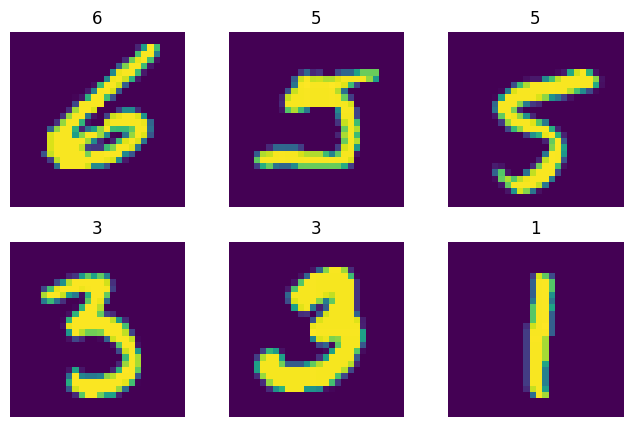

In [ ]:
rows = 2
cols = 3

plt.figure(figsize=(8,5))
for i in range(rows*cols):
  random_index = torch.randint(0,len(test_data),size=[1])[0]
  image,label = test_data[random_index]

  # seeing the images
  plt.subplot(2,3,i+1)
  plt.imshow(torch.squeeze(image))
  plt.title(label)
  plt.axis('off')


plt.show()





# 8.Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
# build the subclass instantiator
class VisionModel0(torch.nn.Module):
  def __init__(self,i,o,h):
    super().__init__()

    # build the conv_block1
    self.conv_block1 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=i,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels=h,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=(2,2))
    )

    # build the conv_block2
    self.conv_block2 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=h,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels=h,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=(2,2))
    )

    # build the classifier layer
    self.classifier_layer = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features=h*7*7,out_features=o)


    )

  def forward(self,x):
    # put the input(x) into the first conv block
    x = self.conv_block1(x)
    # print(x.shape)

    # put the above layer inside second conv block
    x = self.conv_block2(x)
    # print(x.shape)

    # put the above layer inside classifier layer
    x = self.classifier_layer(x)
    # print(x.shape)

    # return the x
    return x

# build the model
class_names = train_data.classes
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model0 = VisionModel0(i=1,h=10,o=len(class_names)).to(device)


#9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

In [ ]:
# compiling and training the model

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)
def accuracy(pred,actual):
  correct = torch.eq(pred,actual).sum().item()
  acc = correct/len(actual)
  return acc

In [ ]:
# fit the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5

for epoch in tqdm(range(epochs)):

  # accumulated loss and accuracy initilization
  a_train_loss,a_train_accuracy,a_test_loss,a_test_accuracy = 0,0,0,0

  # train the model
  model0.train()

  for batch,(x_train,y_train) in enumerate(train_dataloader):

    # put x_train and y_train on right device
    x_train,y_train = x_train.to(device),y_train.to(device)

    # get the train loss and train accuracy
    train_logits = model0(x_train)
    train_predictions = train_logits.argmax(axis=1)
    train_actuals = y_train
    train_loss = loss(train_logits,train_actuals)
    train_accuracy = accuracy(train_predictions,train_actuals)
    a_train_loss += train_loss
    a_train_accuracy += train_accuracy

    # set the optimizer to zero grad on every iteration
    optimizer.zero_grad()

    # back propogate the train loss
    train_loss.backward()

    # step the optimizer up a notch
    optimizer.step()

  # normalize accumulated losses and accuracies per batch
  a_train_loss /= len(train_dataloader)
  a_train_accuracy /= len(train_dataloader)

  # test/evaluate the data
  model0.eval()

  with torch.inference_mode():
    for batch,(x_test,y_test) in enumerate(test_dataloader):

      # putting the data to right devices
      x_test,y_test = x_test.to(device),y_test.to(device)

      # test loss and test accuracy
      test_logits = model0(x_test)
      test_predictions = test_logits.argmax(axis=1)
      test_actuals = y_test
      test_loss = loss(test_logits,test_actuals)
      test_accuracy = accuracy(test_predictions,test_actuals)
      a_test_loss += test_loss
      a_test_accuracy += test_accuracy

    # normalize accumulated test loss and accuracies per batch
    a_test_loss /= len(test_dataloader)
    a_test_accuracy /= len(test_dataloader)

  # print it out
  print('Epoch: {} | Train Loss: {:.3f}, Train Accuracy:{:.3f} | Test Loss: {:.3f} , Test Accuracy: {:.3f}'\
        .format(epoch,a_train_loss,a_train_accuracy,a_test_loss,a_test_accuracy))



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.369, Train Accuracy:0.872 | Test Loss: 0.076 , Test Accuracy: 0.977
Epoch: 1 | Train Loss: 0.072, Train Accuracy:0.977 | Test Loss: 0.052 , Test Accuracy: 0.982
Epoch: 2 | Train Loss: 0.056, Train Accuracy:0.983 | Test Loss: 0.044 , Test Accuracy: 0.986
Epoch: 3 | Train Loss: 0.049, Train Accuracy:0.985 | Test Loss: 0.044 , Test Accuracy: 0.988
Epoch: 4 | Train Loss: 0.043, Train Accuracy:0.987 | Test Loss: 0.044 , Test Accuracy: 0.985


# conclusion:

# lesson learned: before backpropogating zero the gradience of the optimizer.

* the order of placement of optimizer.zero_grad() before train_loss.backward() is crucial!!!
* before it backpropogates to correct for error we need to ensure to zero the optimizer for optimizing towards fresh inputs.
* if the order of placement is incorrect then the gradient would update on incorrect loss parameters leading to incorrect results.

# 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

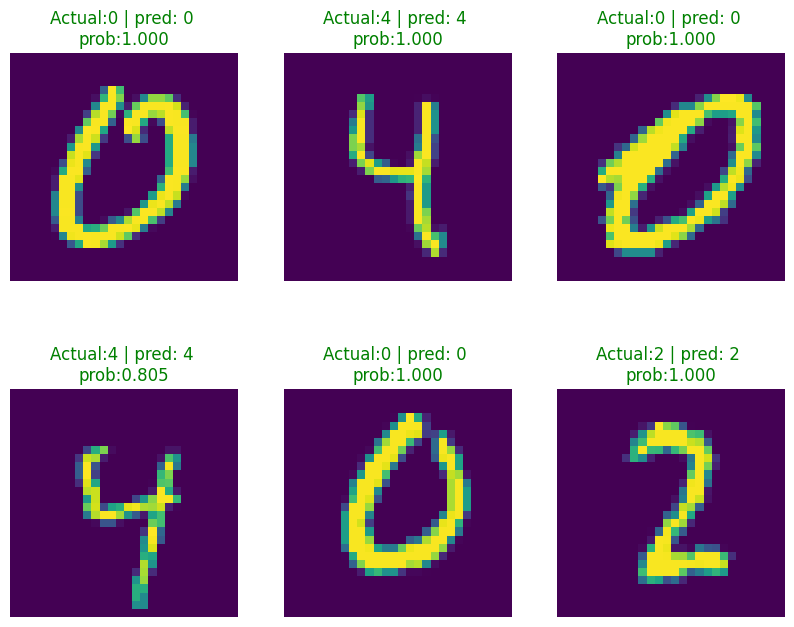

In [ ]:
def preprocess(image):
  return image.unsqueeze(dim=0).to(device)

rows = 2
cols = 3

plt.figure(figsize=(10,8))
for i in range(rows*cols):
  random_index = torch.randint(0,len(test_data),size=[1])[0]
  image,label = test_data[random_index]

  # lets predict
  logits = model0(preprocess(image))
  pred_prob = torch.max(torch.softmax(logits,dim=1))
  pred_label = int(class_names[logits.argmax(dim=1)].split(' -')[0])
  actual_label = label

  # plotting
  plt.subplot(rows,cols,i+1)
  plt.imshow(image.squeeze(dim=0))
  plt.axis('off')

  if actual_label == pred_label:
    title_color = 'g'
  else:
    title_color = 'r'

  plt.title('Actual:{} | pred: {} \nprob:{:.3f}'.format(actual_label,pred_label,pred_prob),
            c=title_color)

plt.show()







# exploration,analysis and freethrows:

In [ ]:
pred_label

'1'

In [ ]:
actual_label

1

In [ ]:
int(pred_label)

1

In [ ]:
model0(test_data[0][0].unsqueeze(dim=0).to(device))

tensor([[ -3.2904,  -3.7974,   6.0624,   8.6164,  -8.1308,  -4.5116, -14.6215,
          19.8048,  -3.6714,   4.7800]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
class_names[model0(test_data[0][0].unsqueeze(dim=0).to(device)).argmax(dim=1)]

'7 - seven'

In [ ]:
class_names[model0(test_data[0][0].unsqueeze(dim=0).to(device)).argmax(dim=1)].split(' -')

'7'

In [ ]:
torch.max(torch.softmax(model0(test_data[0][0].unsqueeze(dim=0).to(device)),dim=1))

tensor(1.0000, device='cuda:0', grad_fn=<MaxBackward1>)

In [ ]:
test_data[0][1] # actual label

7

In [ ]:
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

# 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
# unlike in tensorflow we don't have to do any unbatchification here to get the images and labels seperately.
pred_labels = []
actual_labels = []
class_names = [0,1,2,3,4,5,6,7,8,9]

for image,label in test_data:
  pred_labels.append(class_names[model0(preprocess(image)).argmax(dim=1)])
  actual_labels.append(label)


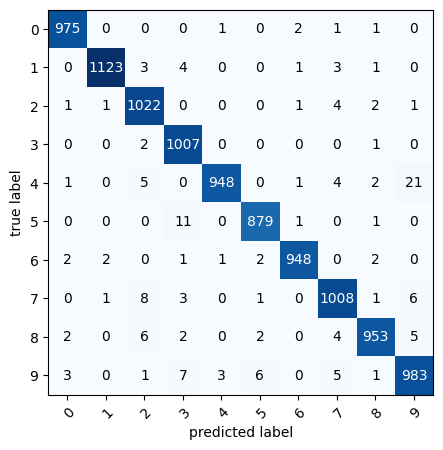

In [ ]:
# creating the confusion matrix
cm = confusion_matrix(actual_labels,pred_labels)

plot_confusion_matrix(cm,
                      class_names=class_names,
                      figsize=(10,5))
plt.show()

# 12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [ ]:
random_tensor = torch.randn([1,3,64,64])
output_class = 1

conv_layer = torch.nn.Conv2d(in_channels=3,
                             out_channels=output_class,
                             kernel_size=(1,1),
                             stride=(1,1),
                             padding=(1,1))

# put the random tensor inside the conv_layer
conv_layer(random_tensor).shape

torch.Size([1, 1, 66, 66])

# conclusion:

* without padding the dimensions of the input image (64x64) would reduce to (62x62).
* if we set the kernel_size(1,1) the size of the input gets expanded, there's some additional information, from (64,64) it gets expanded to (66,66).
* if you take double steps by setting stride to (2,2) you'd get half the dimension of the image. that means bigger strides reduce dimensions.


# 13. Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
# getting the data

train_data = torchvision.datasets.FashionMNIST(root='clothes data',
                                               download=True,
                                               train=True,
                                               transform=torchvision.transforms.ToTensor(),
                                               target_transform=None)

test_data = torchvision.datasets.FashionMNIST(root='clothes data',
                                              download=True,
                                              train=False,
                                              transform=torchvision.transforms.ToTensor(),
                                              target_transform=None)

100%|██████████| 26421880/26421880 [00:02<00:00, 11750884.91it/s]


Extracting clothes/FashionMNIST/raw/train-images-idx3-ubyte.gz to clothes/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200915.82it/s]


Extracting clothes/FashionMNIST/raw/train-labels-idx1-ubyte.gz to clothes/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3740469.94it/s]


Extracting clothes/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to clothes/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6399607.88it/s]

Extracting clothes/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to clothes/FashionMNIST/raw



In [ ]:
# batchifying the data
train_dataloader = torch.utils.data.DataLoader(train_data,
                                               batch_size=32,
                                               shuffle=True)

test_dataloader = torch.utils.data.DataLoader(test_data,
                                              batch_size=32,
                                              shuffle=False)

In [ ]:
# instantiating a model from the previously built model class
class_names = train_data.classes
model2 = VisionModel0(i=1,h=10,o=len(class_names)).to(device)

# compiling the model
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(),
                            lr=0.1)
def accuracy(prediction,actual):
  correct = torch.eq(prediction,actual).sum().item()
  acc = correct/len(actual)
  return acc

# time function
def print_time(start,end):
  total = end-start
  print(total)


# fit the model:
epochs = 5

start = time.perf_counter()
for epoch in tqdm(range(epochs)):

  # accumulated train and test losses and accuracies initialization
  a_train_loss, a_test_loss, a_train_accuracy, a_test_accuracy = 0,0,0,0

  # begin training
  model2.train()
  for batch,(x_train,y_train) in enumerate(train_dataloader):

    # putting all the data to the right device
    x_train,y_train = x_train.to(device),y_train.to(device)

    # getting train loss and train accuracies
    train_logits = model2(x_train)
    train_predictions = train_logits.argmax(dim=1)
    train_actuals = y_train
    train_loss = loss(train_logits,train_actuals)
    train_accuracy = accuracy(train_predictions,train_actuals)
    a_train_loss += train_loss
    a_train_accuracy += train_accuracy

    # zero grad
    optimizer.zero_grad()

    # back propogate
    train_loss.backward()

    # step the optimizer up a notch
    optimizer.step()

  # normalize the accumulated losses and accuracies
  a_train_loss /= len(train_dataloader)
  a_train_accuracy /= len(train_dataloader)

  # begin evaluation
  model2.eval()

  with torch.inference_mode():
    for batch,(x_test,y_test) in enumerate(test_dataloader):

      # putting the data to the right device
      x_test,y_test = x_test.to(device),y_test.to(device)

      # getting test loss and test accuracies
      test_logits = model2(x_test)
      test_predictions = test_logits.argmax(dim=1)
      test_actuals = y_test
      test_loss = loss(test_logits,test_actuals)
      test_accuracy = accuracy(test_predictions,test_actuals)
      a_test_loss += test_loss
      a_test_accuracy += test_accuracy

    # normalize the accumulated losses and accuracies
    a_test_loss /= len(test_dataloader)
    a_test_accuracy /= len(test_dataloader)


    print('Epoch: {} | Train loss: {:.3f} , Train Accuracy: {:.3f} | Test loss: {:3f} , Test accuracy: {:3f}'\
          .format(epoch,a_train_loss,a_train_accuracy,a_test_loss,a_test_accuracy))


end = time.perf_counter()

print_time(start,end)







  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.778 , Train Accuracy: 0.716 | Test loss: 0.401552 , Test accuracy: 0.853235
Epoch: 1 | Train loss: 0.361 , Train Accuracy: 0.870 | Test loss: 0.364868 , Test accuracy: 0.865515
Epoch: 2 | Train loss: 0.323 , Train Accuracy: 0.884 | Test loss: 0.313916 , Test accuracy: 0.886482
Epoch: 3 | Train loss: 0.300 , Train Accuracy: 0.891 | Test loss: 0.320630 , Test accuracy: 0.885683
Epoch: 4 | Train loss: 0.284 , Train Accuracy: 0.899 | Test loss: 0.330691 , Test accuracy: 0.877296
59.851351526000144


# goal: to see where the model goes mostly wrong with high probability

1. get the actual labels and pred labels and pred probabilities, index of the image, of test data.
2. put them all in a dataframe
3. filter it with the condition where the acutal and pred classes don't match with highest probabilities.
4. take the top 9 and visualize them.

In [ ]:
indices = []
pred_probs = []
pred_labels = []
actual_labels = []

for index,(image,label) in enumerate(test_data):
  # putting them in the right device
  image = image.to(device)

  logit = model2(preprocess(image))
  pred_prob = torch.max(torch.softmax(logit,dim=1))
  pred_label = class_names[logit.argmax(dim=1)]
  actual_label = class_names[label]

  # appending them to the empty containers:
  indices.append(index)
  pred_probs.append(pred_prob.to('cpu').detach().numpy())
  pred_labels.append(pred_label)
  actual_labels.append(actual_label)







In [ ]:
# creating the dataframe

df = pd.DataFrame({'index':indices,'pred_prob':pred_probs,'pred_label':pred_labels,'actual_label':actual_labels})
df

,index,pred_prob,pred_label,actual_label
0,0,0.98703045,Ankle boot,Ankle boot
1,1,0.99004376,Pullover,Pullover
2,2,0.9994561,Trouser,Trouser
3,3,0.9997384,Trouser,Trouser
4,4,0.92599255,Shirt,Shirt
...,...,...,...,...
9995,9995,0.9999548,Ankle boot,Ankle boot
9996,9996,0.9970053,Trouser,Trouser
9997,9997,0.99902093,Bag,Bag
9998,9998,0.9998111,Trouser,Trouser


In [ ]:
# filtering based on where the pred label != actual label and pred_prob is the highest
boolean = df['pred_label'] != df['actual_label']
top_9_wrong = df[boolean].sort_values(by='pred_prob',ascending=False)[:9]

top_9_wrong

,index,pred_prob,pred_label,actual_label
2914,2914,0.99922466,Ankle boot,Sneaker
1111,1111,0.9969836,Dress,T-shirt/top
6472,6472,0.9964079,Sandal,Sneaker
3531,3531,0.99412006,Dress,T-shirt/top
1326,1326,0.99378186,Shirt,Dress
5316,5316,0.99123806,Ankle boot,Sneaker
8532,8532,0.987344,Sneaker,Sandal
9238,9238,0.9854864,Sandal,Sneaker
5520,5520,0.984038,Ankle boot,Sneaker


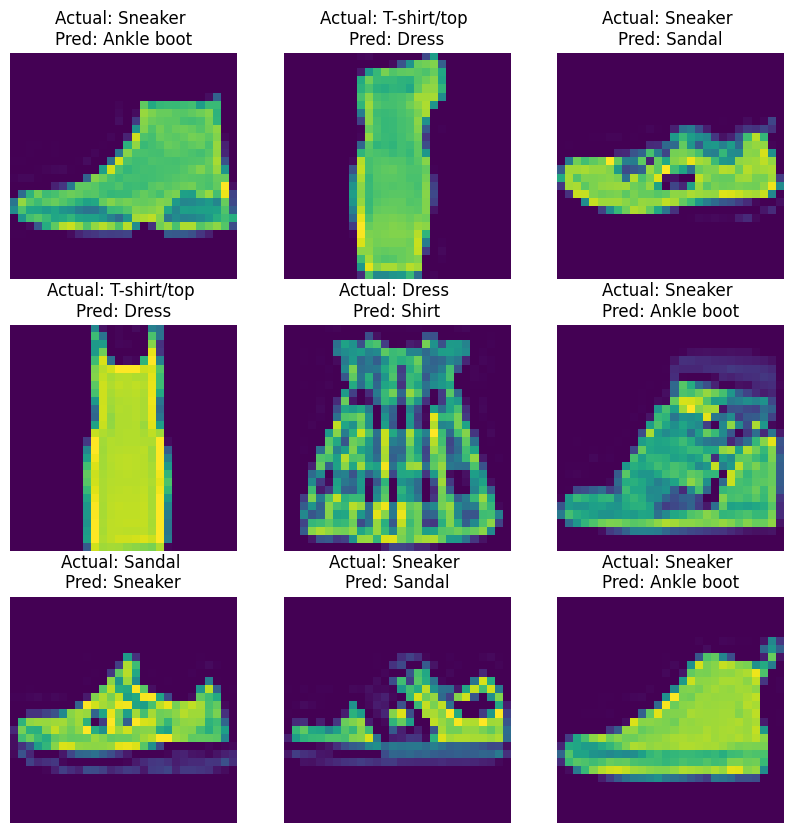

In [ ]:
# access the indices and visualize them:
wrong_indices = top_9_wrong['index'].values
pred_labels = top_9_wrong['pred_label'].values
actual_labels = top_9_wrong['actual_label'].values

rows = 3
cols = 3
plt.figure(figsize=(10,10))

for wi in range(len(wrong_indices)):
  index = wrong_indices[wi]
  image,label = test_data[index]

  plt.subplot(rows,cols,wi+1)
  plt.imshow(torch.squeeze(image,dim=0))
  plt.title('Actual: {} \nPred: {}'.format(actual_labels[wi],pred_labels[wi]))
  plt.axis('off')

plt.show()




# conclusion:
* it seems that the data labels are quite misleading especially with ankle boots, sneakers,shirt and dress.
--------
* when the image has lost all the color dimensional information that helps us distinguish between sneakers and a sandal and a ankle boot even us (humans) would not be able to tell any difference no wonder the machines makes error.
------------
* and also some labels are extremely misleading either due to deprivation of the color dimension or simply the careless labelling error made by the data procurer.

# exploration, analysis and freethrows

In [ ]:
pred_probs[:10]

[array(0.98703045, dtype=float32),
 array(0.99004376, dtype=float32),
 array(0.9994561, dtype=float32),
 array(0.9997384, dtype=float32),
 array(0.92599255, dtype=float32),
 array(0.9984144, dtype=float32),
 array(0.6703144, dtype=float32),
 array(0.92840266, dtype=float32),
 array(0.96733254, dtype=float32),
 array(0.9977533, dtype=float32)]

In [ ]:
index

0

In [ ]:
torch.max(torch.softmax(model2(preprocess(image)),dim=1))

tensor(0.9870, device='cuda:0', grad_fn=<MaxBackward1>)

In [ ]:
class_names[model2(preprocess(image)).argmax(dim=1)]

'Ankle boot'

In [ ]:
for image,label in test_data:
  break

In [ ]:
model2(torch.unsqueeze(train_data[0][0],dim=1).to(device))

tensor([[ 0.1250,  0.0025,  0.1439,  0.1210, -0.0181, -0.0442, -0.1370,  0.0577,
         -0.1318, -0.0372]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
device

'cuda'

In [ ]:
x_train.device

device(type='cpu')

In [ ]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# day 235

# Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the torchvision.models library? What do you think you could do with these?

I was able to find:
1. Resnet
2. Alexnet
3. VGG
4. inception

# For a large number of pretrained PyTorch computer vision models as well as many different extensions to PyTorch's computer vision functionalities check out the PyTorch Image Models library timm (Torch Image Models) by Ross Wightman.

* The goal is to reproduce the imagenet training results. so timm does is it integrates all the state of the art practices, in creating models, choosing optimizers, choosing number of layers, dataloaders, augmentation techinques and so on under one umbrella called `timm`(which stands for torch image models).